### Make isoTWAS miami plot
customize code from Arjun

In [1]:
require(vroom)
require(xlsx)
require(data.table)
library(miamiplot)

Loading required package: vroom

Loading required package: xlsx

Loading required package: data.table



In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
setwd("~/project-gandalm/isoform_twas/TWAS/isoTWAS_SCZ_051723/")
tr = "SCZ"

In [4]:
## READ IN ALL STRONGLY ASSOCIATED ISOFORMS (P < 0.05, Permutation P < 0.05)
total_res = read.xlsx('SupplementalTable_isoTWAS_preFOCUS.xlsx',
                      sheetIndex = 1)

## READ IN ALL FINEMAPPED ISOFORMS
finemap_res_file = 'SupplementalTable_isoTWAS_Finemap.xlsx'
finemap = read.xlsx(finemap_res_file,sheetIndex = 1)

## READ IN RAW DATA
all_res = vroom(paste0(tr,'_isoTWAS.tsv'))
all_res = all_res[complete.cases(all_res),]
all_res$TraitTranscript = paste(tr,
                                all_res$Transcript,
                                sep=':')

Rows: 60722 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Gene, Transcript, topSNP
dbl (4): Z, P, permute.P, topSNP.P

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [5]:
dim(total_res)

[1] 545  15

In [12]:
head(total_res)

,Trait,Gene,HGNC,Chromosome,Start,End,Biotype,Transcript,Z,P,Permutation.P,Top.GWAS.SNP,Top.GWAS.SNP.1,Screening.P,Confirmation.P
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,SCZ,ENSG00000177000,MTHFR,1,11785723,11806455,protein_coding,ENST00000418034.1,5.439111,5.354703e-08,0.03096903,rs4846012,3.073796e-04,0.008679135,4.283762e-07
2,SCZ,ENSG00000142686,C1orf216,1,35713877,35718894,protein_coding,ENST00000453178.1,-5.347911,8.897521e-08,0.02497502,rs6665591,8.878246e-07,0.003210581,8.897521e-08
3,SCZ,ENSG00000116871,MAP7D1,1,36155579,36180849,protein_coding,ENST00000474796.1,-5.336389,9.481598e-08,0.01498501,rs683622,6.132407e-07,0.011931643,5.688959e-07
4,SCZ,ENSG00000116871,MAP7D1,1,36155579,36180849,protein_coding,ENST00000487114.1,-3.975000,7.037926e-05,0.01998002,rs615315,7.037926e-05,0.011931643,4.222755e-04
5,SCZ,ENSG00000185090,MANEAL,1,37793847,37801137,protein_coding,ENST00000329006.5,4.991258,5.998715e-07,0.01798202,rs6698091,7.127172e-05,0.032329945,1.199743e-06
6,SCZ,ENSG00000178922,HYI,1,43450989,43453989,protein_coding,ENST00000483618.1,5.664389,1.475494e-08,0.04795205,rs3791046,1.994310e-06,0.001203283,1.180395e-07


In [14]:
length(unique(total_res$Gene))
length(unique(total_res$Transcript))

[1] 271

[1] 536

In [15]:
dim(finemap)
head(finemap)

[1] 129  18

,HGNC,Transcript,Trait,Ensembl,Chromosome,Start,End,Biotype,Z,P,Permutation.Pvalue,Top.GWAS.SNP,TOP.GWAS.SNP.Pvalue,Screening.Pvalue,Confirmation.Pvalue,PIP,In.credible.set,pLI
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,MTHFR,ENST00000418034.1,SCZ,ENSG00000177000,1,11785723,11806455,protein_coding,5.439111,5.354703e-08,0.03096903,rs4846012,3.073796e-04,0.008679135,4.283762e-07,1.0000000000,TRUE,3.2068e-10
2,C1orf216,ENST00000453178.1,SCZ,ENSG00000142686,1,35713877,35718894,protein_coding,-5.347911,8.897521e-08,0.02497502,rs6665591,8.878246e-07,0.003210581,8.897521e-08,0.0001824572,TRUE,1.3436e-03
3,MAP7D1,ENST00000474796.1,SCZ,ENSG00000116871,1,36155579,36180849,protein_coding,-5.336389,9.481598e-08,0.01498501,rs683622,6.132407e-07,0.011931643,5.688959e-07,0.0005191276,TRUE,9.9199e-01
4,MANEAL,ENST00000329006.5,SCZ,ENSG00000185090,1,37793847,37801137,protein_coding,4.991258,5.998715e-07,0.01798202,rs6698091,7.127172e-05,0.032329945,1.199743e-06,1.0000000000,TRUE,4.9390e-03
5,HYI,ENST00000372425.8,SCZ,ENSG00000178922,1,43450989,43453989,protein_coding,5.663073,1.486862e-08,0.03296703,rs3791046,1.994310e-06,0.001203283,1.189489e-07,1.0000000000,TRUE,2.2375e-14
6,,ENST00000608147.1,SCZ,ENSG00000273026,1,153966516,153966930,lncRNA,-4.843559,1.275336e-06,0.01898102,rs9427232,1.632077e-07,0.022935641,0.000000e+00,0.0210055568,TRUE,NA


In [16]:
length(unique(finemap$Transcript))
length(unique(finemap$Ensembl))

[1] 129

[1] 107

In [19]:
temp <- finemap %>% filter(pLI > 0.9)
dim(temp)
length(unique(temp$Ensembl))

[1] 16 18

[1] 15

In [20]:
dim(all_res)
head(all_res)

[1] 60524     8

Gene,Transcript,Z,P,permute.P,topSNP,topSNP.P,TraitTranscript
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
ENSG00000000419,ENST00000371584.8,0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000371584.8
ENSG00000000419,ENST00000371588.9,-0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000371588.9
ENSG00000000419,ENST00000466152.5,-0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000466152.5
ENSG00000000419,ENST00000371582.8,-0.05454384,0.9565019,1,rs6096226,1.457601e-05,SCZ:ENST00000371582.8
ENSG00000000457,ENST00000367771.11,0.74410384,0.4568137,1,rs6427247,4.427219e-03,SCZ:ENST00000367771.11
ENSG00000000457,ENST00000423670.1,0.90312564,0.3664592,1,rs4656768,3.187298e-02,SCZ:ENST00000423670.1


In [6]:
### COLOR RED THE STRONGLY ASSOCIATED ISOFORMS
all_res$Color = as.factor(ifelse(all_res$Transcript %in% 
                                   total_res$Transcript,
                                 'Yes',
                                 'No'))
table(all_res$Color)


   No   Yes 
59979   545 

In [7]:
### GET LOCATION ANNOTATIONS
require(biomaRt)
ensembl <- useEnsembl(biomart = "genes", dataset = "hsapiens_gene_ensembl")
bm = getBM(attributes = c('ensembl_gene_id', 'hgnc_symbol',
                          'chromosome_name','start_position','end_position',
                          'gene_biotype'),
           filters = 'ensembl_gene_id',
           values = unique(all_res$Gene), 
           mart = ensembl)
colnames(bm) = c('Gene','HGNC','Chromosome','Start','End','Biotype')
all_res = merge(bm,all_res,by='Gene')
all_res$Chromosome = as.numeric(all_res$Chromosome)
all_res = all_res[complete.cases(all_res),]
all_res$HGNC[all_res$HGNC == ''] = all_res$Gene[all_res$HGNC == '']

Loading required package: biomaRt

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [8]:
### REMOVE MHC
www = which(all_res$Chromosome == 6 &
              all_res$Start > 27e6 &
              all_res$End < 35e6)
all_res = all_res[-www,]

In [24]:
# ## LABEL ONLY GENES OF FINEMAPPED TRANSCRIPTS
# all_res$Label = ifelse(all_res$Color == 'Yes' & all_res$Transcript %in%
#                          finemap$Transcript,
#                        all_res$HGNC,
#                        '')

In [9]:
### LABEL ONLY GENES OF FINEMAPPED TRANSCRIPTS NEAR A GWAS SNP
all_res$Label = ifelse(all_res$Color == 'Yes' & all_res$Transcript %in%
                         finemap$Transcript[finemap$TOP.GWAS.SNP.Pvalue < 5e-8],
                       all_res$HGNC,
                       '')

In [10]:
head(all_res)

,Gene,HGNC,Chromosome,Start,End,Biotype,Transcript,Z,P,permute.P,topSNP,topSNP.P,TraitTranscript,Color,Label
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<chr>
1,ENSG00000000419,DPM1,20,50934867,50959140,protein_coding,ENST00000371582.8,-0.05454384,0.9565019,1,rs6096226,1.457601e-05,SCZ:ENST00000371582.8,No,
2,ENSG00000000419,DPM1,20,50934867,50959140,protein_coding,ENST00000371588.9,-0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000371588.9,No,
3,ENSG00000000419,DPM1,20,50934867,50959140,protein_coding,ENST00000466152.5,-0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000466152.5,No,
4,ENSG00000000419,DPM1,20,50934867,50959140,protein_coding,ENST00000371584.8,0.06500000,0.9481740,1,rs6096202,9.481740e-01,SCZ:ENST00000371584.8,No,
5,ENSG00000000457,SCYL3,1,169849631,169894267,protein_coding,ENST00000423670.1,0.90312564,0.3664592,1,rs4656768,3.187298e-02,SCZ:ENST00000423670.1,No,
6,ENSG00000000457,SCYL3,1,169849631,169894267,protein_coding,ENST00000367771.11,0.74410384,0.4568137,1,rs6427247,4.427219e-03,SCZ:ENST00000367771.11,No,


In [11]:
### DEFINE COORDINATES
require(ggplot2)
require(tidyverse)
gwas_results = all_res
plot_df <- gwas_results %>% 
  group_by(Chromosome) %>% 
  # Compute chromosome size
  summarise(chrlength = max(Start)) %>%  
  # Calculate cumulative position of each chromosome
  mutate(cumulativechrlength = cumsum(as.numeric(chrlength))-chrlength) %>% 
  as.data.frame() %>%
#   select(-chrlength) %>%
  # Temporarily add the cumulative length of each chromosome to the initial 
  # dataset 
  left_join(gwas_results, ., by=c("Chromosome"="Chromosome")) %>%
  # Sort by chr then position 
  arrange(Chromosome, Start) %>%
  # Add the position to the cumulative chromosome length to get the position of 
  # this probe relative to all other probes
  mutate(rel_pos = Start + cumulativechrlength) %>%
  # Calculate the logged p-value too
  mutate(logged_p = -log10(P))
#   select(-cumulativechrlength)

axis_df <- plot_df %>% 
  group_by(Chromosome) %>% 
  summarize(chr_center=(max(rel_pos) + min(rel_pos)) / 2)
maxp <- ceiling(max(plot_df$Z, na.rm = TRUE))
minp <- floor(min(plot_df$Z, na.rm = TRUE))

Loading required package: ggplot2

Loading required package: tidyverse

Registered S3 methods overwritten by 'readr':
  method                    from 
  as.data.frame.spec_tbl_df vroom
  as_tibble.spec_tbl_df     vroom
  format.col_spec           vroom
  print.col_spec            vroom
  print.collector           vroom
  print.date_names          vroom
  print.locale              vroom
  str.col_spec              vroom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()         masks data.table::between()
✖ readr::col_character()   masks vroom::col_character()
✖ readr::col_date()        masks vroom::col_date()
✖ readr::col_datetime()    masks vroom::col_datetime()
✖ readr::col_double()      masks vroom::col_double()
✖ readr::col_factor()      masks 

In [12]:
### ONLY LABEL ONE ISOFORM OF A GENE
plot_df = plot_df[order(abs(plot_df$Z),decreasing = T),]
plot_df$Label[duplicated(plot_df$Label)] = ''

In [13]:
### DEFINE THE COLOR GROUPS (RED IF SIGNIFICANT, ALT BLUES FOR CHROMOSOME)
plot_df$colorPoint = ifelse(plot_df$Chromosome %in% c(1,3,5,7,9,11,13,
                                                      15,17,19,21),
                            'navyblue','lightblue')
plot_df$colorPoint[plot_df$Color == 'Yes'] = 'red'
plot_df$colorPoint = factor(as.character(plot_df$colorPoint),
                            levels = c('red','navyblue','lightblue'))

In [14]:
require(ggrepel)
miami <- ggplot() + 
  geom_point(data = plot_df, 
             aes(x = rel_pos, 
                 y = Z, 
                 color = as.factor(colorPoint),
                 size = as.factor(colorPoint))) +
  theme_classic() +
  theme(axis.text=element_text(size=10),
        axis.text.y = element_text(size = 14),
        axis.title=element_text(size=16),
        plot.title = element_text(size = 11),
        legend.title=element_text(size=11),
        legend.text=element_text(size=10),
        strip.text = element_text(size=10),
        panel.spacing=unit(1, "lines"),
        legend.position="bottom",
        legend.box = "horizontal",
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        legend.key.size = unit(0.2, "cm"),
        text = element_text(family = "Helvetica")) +
  scale_color_manual(values = c('red',"navyblue", "lightblue")) +
  scale_size_manual(values = c(0.5,.25,.25)) +
  scale_x_continuous(labels = axis_df$Chromosome, 
                     breaks = axis_df$chr_center, 
                     expand = expansion(mult = 0.01)) +
  scale_y_continuous(limits = c(minp, maxp), 
                     expand = expansion(mult = c(0.02, 0))) + 
  geom_hline(yintercept = c(-4,4), color = "purple", linetype = "dashed", 
             size = 0.5) +
  xlab("Chromosome") +
  ylab('Z-score') + 
  geom_label_repel(data = plot_df,
                   aes(x = rel_pos, y = Z, label = Label),
                   size = 2.5, segment.size = 0.2,
                   max.overlaps = 100000,force = 10) +
  guides(size = 'none',color = 'none')

Loading required package: ggrepel

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


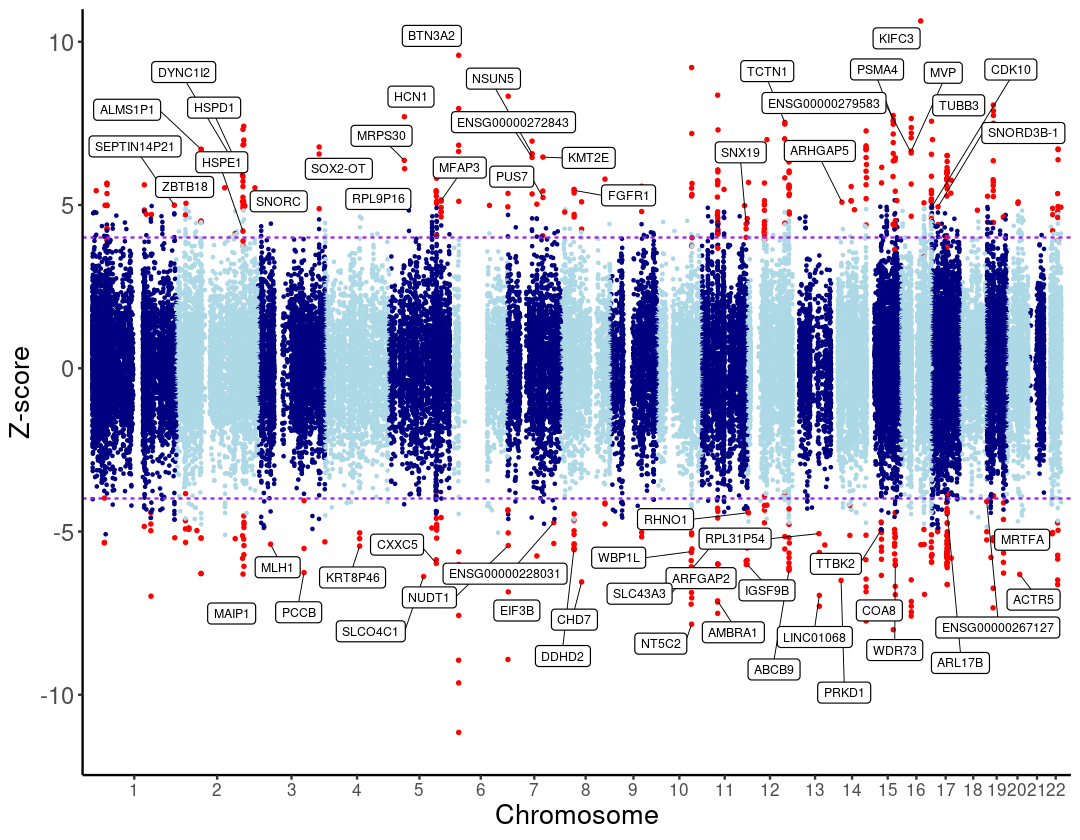

In [15]:
options(repr.plot.height = 7, repr.plot.width = 9)
miami

In [16]:
ggsave(plot = miami,
       filename = paste0(tr,'_Fetal_Miami.png'),
       height = 7,
       width = 9)
ggsave(plot = miami,
       filename = paste0(tr,'_Fetal_Miami.pdf'),
       height = 7,
       width = 9)